In [1]:
import os
from pipeline import pipeline
from esns_relaxed import ESNSRelaxed

In [2]:
"""
experiments = [
    {"model": "TransE", "dataset": "WN18", "negative_sampler": "basic"},
    {"model": "TransE", "dataset": "WN18", "negative_sampler": "esns_relaxed", "similarity_metric": "absolute"},
    {"model": "TransE", "dataset": "WN18", "negative_sampler": "esns_relaxed", "similarity_metric": "jaccard"},
    {"model": "TransE", "dataset": "FB15k", "negative_sampler": "basic"},
    {"model": "TransE", "dataset": "FB15k", "negative_sampler": "esns_relaxed", "similarity_metric": "absolute"},
    {"model": "TransE", "dataset": "FB15k", "negative_sampler": "esns_relaxed", "similarity_metric": "jaccard"}
]
"""
experiments = [
    {"model": "TransE", "dataset": "Nations", "negative_sampler": "basic"},
    {"model": "TransE", "dataset": "Nations", "negative_sampler": "esns_relaxed", "similarity_metric": "absolute"},
    {"model": "TransE", "dataset": "Nations", "negative_sampler": "esns_relaxed", "similarity_metric": "jaccard"},
    {"model": "TransE", "dataset": "Countries", "negative_sampler": "basic"},
    {"model": "TransE", "dataset": "Countries", "negative_sampler": "esns_relaxed", "similarity_metric": "absolute"},
    {"model": "TransE", "dataset": "Countries", "negative_sampler": "esns_relaxed", "similarity_metric": "jaccard"}
]


neg_samplers_dict = {"basic": "basic", "esns_relaxed": ESNSRelaxed}

index_column_size=1000
index_path_base = "EII"
sampling_size=100
q_set_size=50

results_path_base = "results"
checkpoint_path = "checkpoints"
num_epochs=10
device="cpu"

In [3]:
for exp in experiments:

    exp_name = "-".join(list(exp.values()))
    exp["exp_name"] = exp_name
    print("Training for {}".format(exp_name))

    if "esns" in exp["negative_sampler"]:
        negative_sampler_kwargs=dict(
            index_column_size=index_column_size,
            index_path=index_path_base + "/" + exp["dataset"],
            sampling_size=sampling_size,
            q_set_size=q_set_size,
            similarity_metric=exp["similarity_metric"]
        )
    else:
        negative_sampler_kwargs=dict()
    

    results= pipeline(
        dataset=exp["dataset"],
        model=exp["model"],
        negative_sampler=neg_samplers_dict[exp["negative_sampler"]],
        negative_sampler_kwargs=negative_sampler_kwargs,
        # Training configuration
        training_kwargs=dict(
            num_epochs=num_epochs,
            use_tqdm_batch=False,
            checkpoint_name=checkpoint_path + '/' + exp_name +'.pt',

        checkpoint_frequency=5,
        ),  
        # Runtime configuration
        #random_seed=1235,
        device=device,
    )

    save_path = results_path_base + "/" + exp_name
    os.makedirs(save_path)
    results.save_to_directory(save_path)

No random seed is specified. Setting to 1357699860.


Training for TransE-Nations-basic


c:\Users\Jannis\miniconda3\envs\kge\lib\site-packages\pykeen\nn\representation.py:372: UserWarning: Directly use Embedding.max_id instead of num_embeddings.
  warnings.warn(f"Directly use {self.__class__.__name__}.max_id instead of num_embeddings.")


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.10s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, num_triples=1592, inverse_triples=False, path="C:\Users\Jannis\miniconda3\envs\kge\Lib\site-packages\pykeen\datasets\nations\train.txt") to file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Nations-basic/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Nations-basic
INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///C:/Users/Jannis/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQ

Training for TransE-Nations-esns_relaxed-absolute


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

INFO:ESNSRelaxed:Loading EII EII/Nations/ESNSRelaxed_absolute_similarity_k14_h.pkl
INFO:ESNSRelaxed:Loading EII EII/Nations/ESNSRelaxed_absolute_similarity_k14_t.pkl
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, num_triples=1592, inverse_triples=False, path="C:\Users\Jannis\miniconda3\envs\kge\Lib\site-packages\pykeen\datasets\nations\train.txt") to file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Nations-esns_relaxed-absolute/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Nations-esns_relaxed-absolute
INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///C:/Users/Jannis/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/nations/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/nations

Training for TransE-Nations-esns_relaxed-jaccard


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

INFO:ESNSRelaxed:Loading EII EII/Nations/ESNSRelaxed_jaccard_similarity_k14_h.pkl
INFO:ESNSRelaxed:Loading EII EII/Nations/ESNSRelaxed_jaccard_similarity_k14_t.pkl
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/201 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=14, num_relations=55, num_triples=1592, inverse_triples=False, path="C:\Users\Jannis\miniconda3\envs\kge\Lib\site-packages\pykeen\datasets\nations\train.txt") to file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Nations-esns_relaxed-jaccard/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Nations-esns_relaxed-jaccard
INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///C:/Users/Jannis/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/count

Training for TransE-Countries-basic


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=271, num_relations=2, num_triples=1110, inverse_triples=False, path="C:\Users\Jannis\.data\pykeen\datasets\countries\train.txt") to file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Countries-basic/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Countries-basic
INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///C:/Users/Jannis/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/testing
INFO

Training for TransE-Countries-esns_relaxed-absolute


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

INFO:ESNSRelaxed:Loading EII EII/Countries/ESNSRelaxed_absolute_similarity_k271_h.pkl
INFO:ESNSRelaxed:Loading EII EII/Countries/ESNSRelaxed_absolute_similarity_k271_t.pkl
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=271, num_relations=2, num_triples=1110, inverse_triples=False, path="C:\Users\Jannis\.data\pykeen\datasets\countries\train.txt") to file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Countries-esns_relaxed-absolute/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Countries-esns_relaxed-absolute
INFO:pykeen.datasets.utils:Loading cached preprocessed dataset from file:///C:/Users/Jannis/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-_TImW-5JCeuQeRkm5NM/training
INFO:pykeen.triples.triples_factory:Loading from file:///C:/Users/Jannis/.data/pykeen/datasets/countries/cache/47DEQpj8HBSa-

Training for TransE-Countries-esns_relaxed-jaccard


Training epochs on cpu:   0%|          | 0/10 [00:00<?, ?epoch/s]

INFO:ESNSRelaxed:Loading EII EII/Countries/ESNSRelaxed_jaccard_similarity_k271_h.pkl
INFO:ESNSRelaxed:Loading EII EII/Countries/ESNSRelaxed_jaccard_similarity_k271_t.pkl
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.07s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=271, num_relations=2, num_triples=1110, inverse_triples=False, path="C:\Users\Jannis\.data\pykeen\datasets\countries\train.txt") to file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Countries-esns_relaxed-jaccard/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///D:/Master%20Angewandte%20Informatik/Masterarbeit/custom_code/results/TransE-Countries-esns_relaxed-jaccard


[]

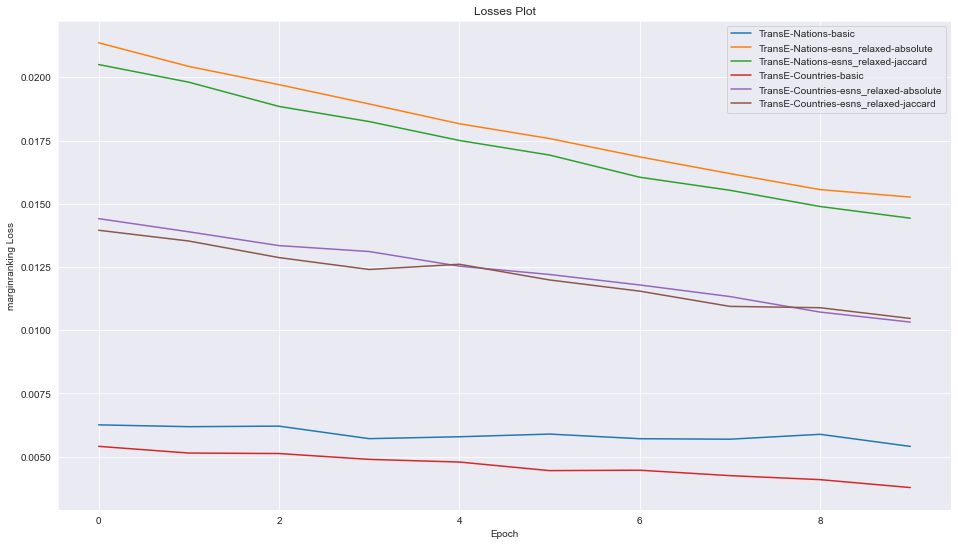

In [4]:
"""
plt.figure(figsize=(16,9))
for k in results.keys():
    results[k].plot_losses()
plt.legend([exp["exp_name"] for exp in experiments])
plt.plot()
""" 